<a href="https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch7_1_2_RNN_theory(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (2)"
date: 2020-04-23T10:08:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "Binary Classification"
  - "Classification"
  - "순환 신경망"
  - "GRU 레이어"
  - "RNN"
  - "임베딩 레이어"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Image Augmentation"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (2)
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶으신 분은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)
- [Tensorflow 2.0 Tutorial ch5.1 - 분류](https://chloevan.github.io/python/tensorflow2.0/ch5_1_binary_classification/)
- [Tensorflow 2.0 Tutorial ch5.2 - 다항분류](https://chloevan.github.io/python/tensorflow2.0/ch5_2_multi_classification/)
- [Tensorflow 2.0 Tutorial ch5.3 - Fashion MNIST](https://chloevan.github.io/python/tensorflow2.0/ch5_3_fashion_mnist/)
- [Tensorflow 2.0 Tutorial ch6.1-2 - CNN 이론](https://chloevan.github.io/python/tensorflow2.0/ch6_1_2_cnn_theory/)
- [Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습](https://chloevan.github.io/python/tensorflow2.0/ch6_3_fashion_mnist_with_cnn/)
- [Tensorflow 2.0 Tutorial ch6.4 - 모형의 성능 높이기](https://chloevan.github.io/python/tensorflow2.0/ch6_4_improve_performance/)
- [Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (1)](https://chloevan.github.io/python/tensorflow2.0/ch7_1_2_rnn_theory1/)


## I. 개요

GRU(`Gated Recurrent Unit`)레이어는 `LSTM`레이어와 비슷한 역할을 하지만 구조가 더 간단하기 때문에 계산상의 이점이 있고, 어떤 문제에서는 `LSTM` 레이어보다 좋은 성능을 보여주기도 합니다.[^1][^2] 셀로 나타낸 `GRU` 레이어의 계산 흐름은 `LSTM`과 비슷하지만, 조금 축약된 모습을 보입니다.[^3] 

![](/img/tensorflow2.0/tutorial_07_01_2/tutorial_02_RNN_LSTM_GRU.png)

자세한 수식 및 이론 설명은 교재를 구매하셔서 194-5페이지를 참고하시기를 바랍니다. GRU의 성능이 LSTM보다 실제로 성능이 좋은지, 수식이 줄었기 때문에, 또한 연산속도는 빨라졌는지 확인해보도록 합니다. 

[^1]: Cho, K., Merrienboer, B. V., Gulcehre, C., Bahdanau, D., Bougares, F., Schwenk, H., & Bengio, Y. (2014). Learning Phrase Representations using RNN Encoder–Decoder for Statistical Machine Translation. Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP). doi: 10.3115/v1/d14-1179

[^2]: Chung, J., Gulcehre, C., Cho, K., & Bengio, Y. (2014). Empirical evaluation of gated recurrent neural networks on sequence modeling. In NIPS 2014 Workshop on Deep Learning, December 2014

[^3]: 교재 195페이지를 확인하면 여러 수식이 나옵니다. 여기서 주목해야 하는 것은 `LSTM`레이어보다 시그모이드 함수가 하나 적게 쓰였는데, 이것은 게이트의 수가 하나 줄어들었다는 것을 의미합니다. 

## II. GRU 모델 정의 및 구현

[ch7.1 - RNN(1)](https://chloevan.github.io/python/tensorflow2.0/ch7_1_2_rnn_theory1/) 이론에서 배웠던 곱셈 정의 문제를 다시 풀어보도록 합니다. 

In [0]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

In [0]:
X = []
Y = []
for i in range(3000): 
  # 0 ~ 1 범위의 랜덤한 숫자 100개를 만듭니다. 
  lst = np.random.rand(100)

  # 마킹할 숫자 2개의 인덱스를 뽑습니다. 
  idx = np.random.choice(100, 2, replace=False)

  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다. 
  zeros=np.zeros(100)
  zeros[idx]=1
  
  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다. 
  X.append(np.array(list(zip(zeros, lst))))
  # 마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장합니다. 
  Y.append(np.prod(lst[idx]))

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]), 
  tf.keras.layers.GRU(units=30), 
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


기존 `LSTM` 모델 정의 코드에서 `GRU`로 바꿔서 간단히 모델을 정의할 수 있습니다. `GRU`레이어를 사용한 네트워크의 파라미터 수는 `LSTM`레이어의 파라미터 수보다 적습니다. 

이전 포스트에서 작성했던 파라미터 수를 비교하면 다음과 같습니다. 

| SimpleRNN 	| LSTM 	| GRU 	|
|:---------:	|--------	|:-----:	|
| 2,851 	| 11,311 	| 8,671 	|

그럼 이제 실제로 학습시켜서 결과가 어떻게 나오는지 확인합니다. 코드 역시, 그 전과 큰 차이점은 없기 때문에 전체 소스코드를 이어서 작성합니다. 

Epoch 1/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0542 - val_loss: 0.0464
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0498 - val_loss: 0.0465
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0496 - val_loss: 0.0462
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0496 - val_loss: 0.0466
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0502 - val_loss: 0.0472
Epoch 6/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0498 - val_loss: 0.0462
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0497 - val_loss: 0.0465
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0496 - val_loss: 0.0462
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0493 - val_loss: 0.0463
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0491 - val_loss: 0.0464

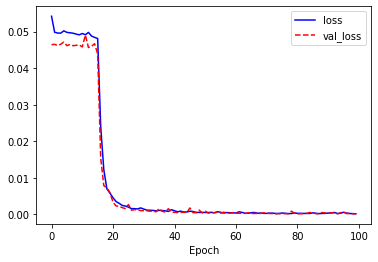

14/14 [==============================] - 0s 5ms/step - loss: 1.3132e-04
0.03254906333292209 	 0.028674547 	diff: 0.003874516703731644
0.0459566112724449 	 0.040693775 	diff: 0.005262836453070817
0.5360537450610645 	 0.5460534 	diff: 0.009999664515351503
0.14992662254277317 	 0.14886208 	diff: 0.0010645437568768679
0.38647776052320765 	 0.38145044 	diff: 0.005027316063292486
correctness: 99.31818181818181 %


In [0]:
X = np.array(X)
Y = np.array(Y)

# 모형 학습
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

# 모형 학습 시각화 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 모형 테스트 및 결과
model.evaluate(X[2560:], Y[2560:])
prediction=model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시합니다. 
for i in range(5): 
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  # 오차가 0.04 이상이면 오답입니다. 
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail +=1

print('correctness:', (440-fail)/440*100, '%')

정확도는 99.3%로 거의 99%에 가까운 값이 나옵니다. 이 문제에서는 `LSTM` 레이어보다 `GRU`레이어로 더 잘 풀리는 문제입니다. 

마지막 이론으로 임베딩 레이어에 대해 배우도록 합니다. 

## III. 임베딩 레이어 기본 이론
임베딩 레이어(`Embedding Layer`)는 자연어를 수치화된 정보로 바꾸기 위한 레이어입니다. 자연어는 시간의 흐름에 따라 정보가 연속적으로 이어지는 시퀀스 데이터입니다. 이미지를 픽셀 단위로 잘게 쪼갤 수 있듯이 자연어도 정보를 잘게 쪼갤 수 있습니다. 영어는 문자(`character`), 한글은 문자를 넘어 자소 단위로도 쪼갤 수 있습니다. 과거에는 n-gram보다 단어나 문자 단위의 자연어 처리가 많이 쓰입니다.[^4] 

임베딩 레이어보다 좀 더 쉬운 기법은 자연어를 구성하는 단위에 대해 정수 인덱스(index)를 저장하는 방법입니다. 좀 더 쉽게 예로 들면, "This is a big cat"이라는 문장에 대해 정수 인덱스를 저장하면 처음 나오는 단어부터 인덱스를 저장합니다. 

| 단어 	| 인덱스 	|
|:---------:	|--------	|
| this 	| 0 	|
| is 	| 1 	|
| a 	| 2 	|
| big 	| 3 	|
| cat 	| 4 	|

이렇게 새로운 수치화된 데이터로 변환될 수 있습니다. 이 때 "This is big."이라는 새로운 문장도 [0,1,3]이라는 데이터로 바뀔 수 있습니다. 이렇게 바뀐 데이터는 아래 그림과 같이 원-핫 인코딩을 이용해 단어의 인덱스에 해당하는 원소만 1이고 나머지는 0인 배열로 바뀝니다. 

![](/img/tensorflow2.0/tutorial_07_01_2/tutorial_02_word_embedding.png)


그런데, 인덱스를 사용할 때, 가장 큰 문제점은 사용하는 메모리의 양에 비해 너무 적은 정보량을 표현하는 것이고, 또 한가지 단점은 저장된 단어의 수가 많아질수록 원-핫 인코딩 배열의 두 번째 차원의 크기도 그에 비례해서 늘어나기 때문에 이 데이터가 차지하는 메모리의 양이 더욱 늘어나게 됩니다. 추가적인 이론에 대한 내용은 교재 201-3페이지를 확인하셔서 추가적인 이론 공부를 병행하는 것을 권합니다. 

임베딩 레이어에 대해 학습시키는 방법은 `Word2Vec`, `GloVe`, `FastText`, `ELMo`등과 같은 방법론이 있습니다. 

우선 단어 임베딩의 이론적인 코드 부분을 학습하고자 예제(감성분석)를 준비했습니다. 교재에는 조금 부족한 부분이라 판단되어, 텐서플로 공식홈페이지의 내용을 번역 및 축약합니다.[^5] 

[^4]: N-Gram은 간단하게 예를 들어 설명하면, "This is it"이라는 문장을 3개의 문자를 묶은 `3-gram`으로 나타내면 ["Thi", "his", "is ", "s i", " is", "is ", "s i", " it", "it."]이라는 배열로 나타낼 수 있습니다. 

[^5]: Word embeddings, https://www.tensorflow.org/tutorials/text/word_embeddings

### (1) 코드 작성 및 설명
먼저 관련 모듈과 데이터를 가져옵니다. 

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# 데이터 수집 / 영화 데이터
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete70Q64U/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete70Q64U/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete70Q64U/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


그리고, encoder를 통해서 실제 텍스트의 단어의 크기를 확인합니다. 

In [0]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


이론에서 배웠던, 입력된 `Sample String`에 대해 인코딩된 값을 인덱스로 반환합니다. 그리고, 원 문자열도 같이 반환되어 어떻게 변환되는지 확인할 수 있습니다. 

In [0]:
sample_string = 'Hello ChloEvan.'
encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6995, 1163, 6275, 8039, 7975]
The original string: "Hello ChloEvan."


이제 다시 인덱스로 출력하면 전체 `vocab_size`에서 샘플 문자열이 어떤식으로 구성이 되는지 확인할 수 있습니다. 

In [0]:
assert original_string == sample_string
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6995 ----> Ch
1163 ----> lo
6275 ----> Eva
8039 ----> n
7975 ----> .


이제 모형을 위해 학습 데이터를 준비합니다.


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE,  padded_shapes=([None],[])))

그런데, 아래 코드에서 `pad`라는 개념이 보일겁니다. `pad`은 공백을 의미합니다. `padding`의 개념이 있는 것은, 자연어에는 미리 정해놓을 수 없을 정도로 많은 단어가 존재하기 때문에, 보통은 정수 인덱스로 저장하지 않는 단어에 대한 임베딩 값을 별도로 마련합니다. 즉, 임베딩 레이어의 행 수가 10,000이라면 9,999는 미리 지정된 단어의 개수이고, 나머지 1은 지정되지 않은 단어를 위한 값입니다. 이것이 padding의 개념입니다. 

`padded_batch`의 함수를 사용함으로써, UNK값으로 0을 넣어줍니다. 실제로 `padded_batch`가 어떻게 구현이 되는지 확인해봅니다. 

In [0]:
train_batch, train_labels = next(iter(train_dataset))
train_batch.numpy()

array([[  62,    9,   41, ...,    0,    0,    0],
       [ 134,  142, 7968, ...,    0,    0,    0],
       [  12, 6130,    7, ...,    0,    0,    0],
       ...,
       [ 684,  807,  455, ...,    0,    0,    0],
       [ 373,    6,    1, ...,    6, 1803, 7975],
       [  62,    9,   45, ...,    0,    0,    0]])

위 값에 0이 있는 것을 확인할 수 있습니다. `padded_batch`를 함으로써 일종의 길이의 정규화를 진행한다고 보면 됩니다. 

아래 코드는 모델 정의 및 학습에 관한 내용입니다. 튜토리얼에서 반복적으로 나오는 코드이기 때문에 여기에서는 설명을 생략합니다. 



In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 44s 113ms/step - loss: 0.6474 - accuracy: 0.5586 - val_loss: 0.4672 - val_accuracy: 0.7865
Epoch 2/10
391/391 [==============================] - 44s 113ms/step - loss: 0.3531 - accuracy: 0.8537 - val_loss: 0.3419 - val_accuracy: 0.8589
Epoch 3/10
391/391 [==============================] - 45s 114ms/step - loss: 0.2525 - accuracy: 0.9042 - val_loss: 0.3268 - val_accuracy: 0.8651
Epoch 4/10
391/391 [==============================] - 45s 114ms/step - loss: 0.2089 - accuracy: 0.9218 - val_loss: 0.3332 - val_accuracy: 0.8656
Epoch 5/10
391/391 [==============================] - 45s 116ms/step - loss: 0.1824 - accuracy: 0.9350 - val_loss: 0.3999 - val_accuracy: 0.8130
Epoch 6/10
391/391 [==============================] - 45s 115ms/step - loss: 0.1625 - accuracy: 0.9419 - val_loss: 0.3684 - val_accuracy: 0.8661
Epoch 7/10
391/391 [==============================] - 45s 116ms/step - loss: 0.1455 - accuracy: 0.9504 - val_loss: 0.3698 - val_ac

모형의 학습이 끝나면 실제로 잘 학습되는지 그래프를 작성합니다. 

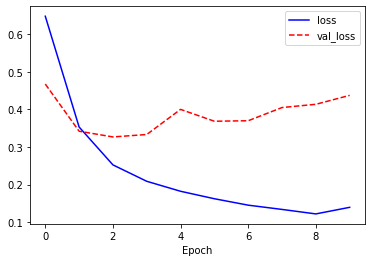

391/391 [==============================] - 16s 42ms/step - loss: 0.4282 - accuracy: 0.8523
Test Loss: 0.4281919002532959
Test Accuracy: 0.8522800207138062


In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))



## IV. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch7_1_2_RNN_theory(2).ipynb) 

## VI. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.